## This is the notebook for python

We are using SciKit Learn to provide us the machine learning models for earthquake prediction given a location and timestamp and in the future also predict an upcoming earthquake along with when it may occur.

We are (and have) experimented with multiple different models and datasets. We used Kaggle to provide us the datasets required. The models that we've tested are Linear Regression, Multiple Regression, Decision Tree, Random Forest, and Grid Search Via Random Forest. We are also planning on testing whether neural networks would provide us a better optimization. Currently, we are testing grid search via random forest and our highest scoring models based on the ones tested already is Random Forest with an accuracy of 86%.

In [1]:
# install dependencies: numpy, matplotlib, pandas
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install basemap
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import required dependancies
#-----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\adity\AppData\Local\Temp\ipykernel_24152\4084351598.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [22]:
data = pd.read_csv("final_data.csv")
data.describe()

,latitude,longitude,mag,depth,timestamp
count,3.749279e+06,3.749279e+06,3.749279e+06,3.749279e+06,3.749279e+06
mean,3.610546e+01,-9.983861e+01,1.900921e+00,2.256044e+01,1.114155e+09
std,2.004812e+01,7.768673e+01,1.266708e+00,5.530050e+01,3.890529e+08
min,-8.442200e+01,-1.799990e+02,1.000000e-02,0.000000e+00,9.471240e+07
25%,3.368367e+01,-1.416976e+02,1.000000e+00,3.340000e+00,8.231220e+08
50%,3.756700e+01,-1.189253e+02,1.550000e+00,7.547000e+00,1.184695e+09
75%,4.451600e+01,-1.159252e+02,2.400000e+00,1.560000e+01,1.452330e+09
max,8.738600e+01,1.800000e+02,9.100000e+00,7.358000e+02,1.641010e+09


In [36]:
# trunticate the data and refactor to timestamp
#-------------------------------------------------
final_data = data[data['mag'] > 4]
final_data.describe()

,latitude,longitude,mag,depth,timestamp
count,424819.000000,424819.000000,424819.000000,424819.000000,4.248190e+05
mean,5.521807,40.424378,4.636968,79.803872,1.057210e+09
std,29.076441,120.266670,0.444858,126.376416,4.138035e+08
min,-84.422000,-179.999000,4.010000,0.000000,9.472320e+07
25%,-16.722000,-71.890000,4.300000,10.000000,7.716168e+08
50%,2.023000,96.804000,4.500000,33.000000,1.137917e+09
75%,31.032500,141.906900,4.800000,75.100000,1.403635e+09
max,87.386000,180.000000,9.100000,735.800000,1.641006e+09


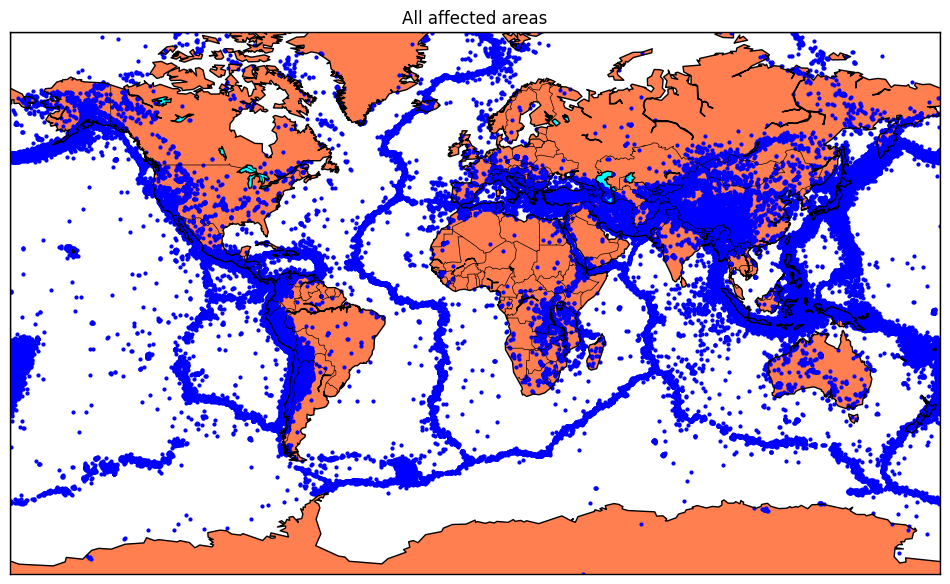

In [37]:
# plot the values for data visualization
#----------------------------------------
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = final_data["longitude"].tolist()
latitudes = final_data["latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc', resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [19]:
final_data.to_csv("final_data.csv", encoding='utf-8', index=False)

In [9]:
X = final_data[['timestamp', 'latitude', 'longitude']]
y = final_data[['mag', 'depth']]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)  

(3084575, 3) (771144, 3) (3084575, 2) (771144, 3)


In [11]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
linear_regressor.score(X_test, y_test)

0.24567500234410783

In [21]:
from sklearn.tree import DecisionTreeRegressor
decisiontree_regressor = DecisionTreeRegressor(random_state=0)
decisiontree_regressor.fit(X_train, y_train)
decisiontree_regressor.score(X_test, y_test)

NameError: name 'X_train' is not defined

In [12]:
from sklearn.ensemble import RandomForestRegressor
randomforest_regressor = RandomForestRegressor(random_state=0)
randomforest_regressor.fit(X_train, y_train)
randomforest_regressor.score(X_test, y_test)

0.8610561053936627

In [16]:
import pickle

# save the models to disk
linear_regressor_filename = 'linear_regressor.sav'
pickle.dump(linear_regressor, open(linear_regressor_filename, 'wb'))

decisiontree_regressor_filename = 'decisiontree_regressor.sav'
pickle.dump(decisiontree_regressor, open(decisiontree_regressor_filename, 'wb'))

In [19]:
import joblib

randomforest_regressor_filename = 'randomforest_regressor.sav'
joblib.dump(randomforest_regressor, 'randomforest_regressor.sav', compress=3)

['randomforest_regressor.sav']

In [ ]:
loaded_model = joblib.load('randomforest_regressor.sav')

In [14]:
#from sklearn.model_selection import GridSearchCV

#parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}  
  
#grid_obj = GridSearchCV(randomforest_regressor, parameters)
#grid_fit = grid_obj.fit(X_train, y_train)
#best_fit = grid_fit.best_estimator_
#best_fit.score(X_test, y_test)